In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns
import ast

# Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Clean Up
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda string_list: ast.literal_eval(string_list) if pd.notna(string_list) else string_list)


In [19]:
df.sample(10)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
353487,Data Analyst,Panel Data Analyst,"Bremen, Germany",via Jobs Trabajo.org,Full-time,False,Germany,2023-10-19 23:35:26,False,False,Germany,None,NaN,NaN,JACOBS DOUWE EGBERTS DE GmbH,[power bi],{'analyst_tools': ['power bi']}
265978,Data Analyst,Banking Operations Data Analyst,"Plano, TX",via BeBee,Full-time,False,"Texas, United States",2023-03-07 07:03:25,True,False,United States,None,NaN,NaN,Global Payments Inc.,"[sql, snowflake, tableau, looker]","{'analyst_tools': ['tableau', 'looker'], 'clou..."
685835,Data Scientist,Data Scientist - eCommerce,"Reading, UK",via Indeed,Full-time,False,United Kingdom,2023-04-19 10:22:18,False,False,United Kingdom,None,NaN,NaN,HP,"[python, databricks, pyspark, notion]","{'async': ['notion'], 'cloud': ['databricks'],..."
82272,Data Engineer,DataEngineer,"Budapest, Hungary",via Jobrapido.com,Full-time,False,Hungary,2023-01-16 00:29:38,True,False,Hungary,None,NaN,NaN,Andersen,"[postgresql, dynamodb, aws, redshift]","{'cloud': ['aws', 'redshift'], 'databases': ['..."
566204,Data Scientist,Lead Data Scientist,"Watertown, MA",via LinkedIn,Full-time,False,Georgia,2023-10-29 04:35:36,False,False,United States,None,NaN,NaN,Cirkul,"[sql, python, pandas, numpy]","{'libraries': ['pandas', 'numpy'], 'programmin..."
118574,Data Engineer,Data Science Engineer,"Calamba, Laguna, Philippines",via Indeed,Full-time,False,Philippines,2023-09-08 08:52:14,False,False,Philippines,None,NaN,NaN,Sigma Dynamics and Professionals Placement Com...,None,None
571988,Data Engineer,Data Engineer Intern,"Beijing, China",via The Muse,Internship,False,China,2023-02-14 09:45:52,False,False,China,None,NaN,NaN,Amazon,"[sql, python, perl, aws]","{'cloud': ['aws'], 'programming': ['sql', 'pyt..."
185791,Data Scientist,Data Scientist,"Hanover, Germany",via BeBee,Full-time,False,Germany,2023-10-16 15:33:13,False,False,Germany,None,NaN,NaN,Workwise GmbH,None,None
220062,Data Analyst,analytics engineer pleno,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-03-20 22:24:57,False,False,Brazil,None,NaN,NaN,Clearsale,"[python, sql, databricks, spark]","{'cloud': ['databricks'], 'libraries': ['spark..."
79276,Data Engineer,ETL Developer(Azure Data Engineer Certification),"Bengaluru, Karnataka, India",via Recruit.net,Full-time,False,India,2023-01-08 00:09:20,False,False,India,None,NaN,NaN,"Enterprise Minds, Inc","[sql, python, azure]","{'cloud': ['azure'], 'programming': ['sql', 'p..."


In [ ]:
# Filter for USA Data Scientists roles
df_DS_US = df[(df['job_country'] == 'United States') &
              (df['job_title_short'] == 'Data Scientist')]

In [34]:
df_plot =df_DS_US['job_location'].value_counts().head(10).to_frame()
print(df_plot)

# Change index 'United States' to 'Unknown'
df_plot.rename(index={'United States': 'Unknown'}, inplace=True)

                   count
job_location            
Anywhere            6126
United States       2667
New York, NY        1911
Atlanta, GA         1787
Washington, DC      1695
San Francisco, CA   1612
Chicago, IL          980
Los Angeles, CA      833
Arlington, VA        749
Charlotte, NC        737


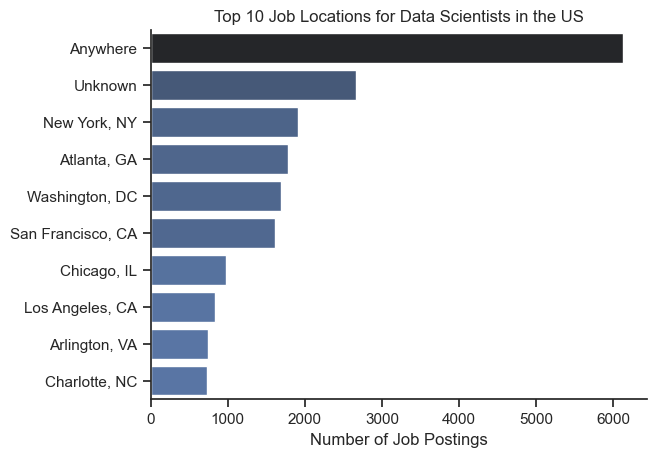

In [ ]:
# Plot Popular Job Locations in US in 2023
sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r')
plt.ylabel("")
plt.xlabel("Number of Job Postings")
plt.title("Top 10 Job Locations for Data Scientists in the US")
plt.legend().set_visible(False)
sns.despine()

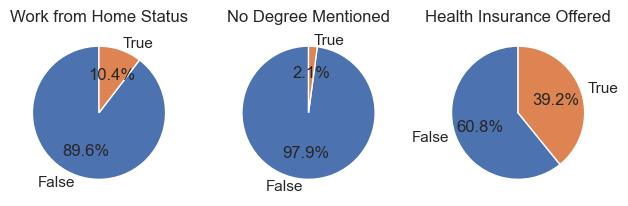

In [ ]:
# Plot Job Offerings in 2023
dict_cols = {
    'job_work_from_home': 'Work from Home Status',
    'job_no_degree_mention': 'No Degree Mentioned',
    'job_health_insurance': 'Health Insurance Offered' }

fig, ax = plt.subplots(1,3)

for i, (col, title) in enumerate(dict_cols.items()):
    df_DS_US[col].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[i])
    ax[i].set_ylabel('')
    ax[i].set_title(title)

#fig.suptitle('Data Job Work Offering in 2023', fontsize=16)
plt.tight_layout()
plt.show()

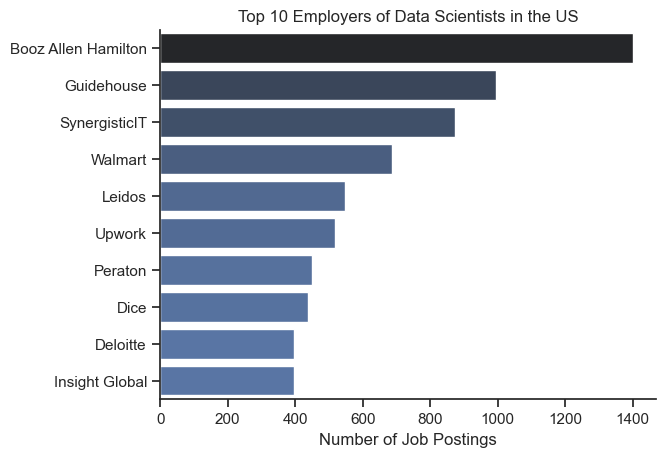

In [58]:
# Plot Popular Job Employers in US in 2023
df_plot =df_DS_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y=df_plot.index, hue='count', palette='dark:b_r')
plt.ylabel("")
plt.xlabel("Number of Job Postings")
plt.title("Top 10 Employers of Data Scientists in the US")
plt.legend().set_visible(False)
sns.despine()